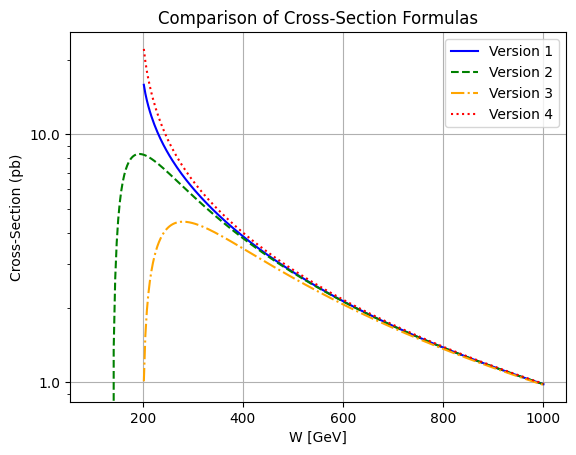

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Generate x values from 100 to 1000
wvalue = np.linspace(100, 1000, 300)


#=================================================================


def cs_version_1(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - beta* (1.0 + 4.0 * mtau * mtau / wvalue**2.0) )  * 1e9

    return cs


#=================================================================


def cs_version_2(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))
    
    cs = 4.0 * np.pi * hbarc2 * alpha2 / wvalue / wvalue \
         * ( (1.0 + 4.0*mtau*mtau/wvalue/wvalue)*np.log(wvalue * wvalue / mtau / mtau) - 1.0 - 2.0*mtau*mtau/wvalue/wvalue)  * 1e9

    return cs


#=================================================================


def cs_version_3(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 100
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mtau, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs


#=================================================================

def cs_version_4(wvalue):
    mtau = 100
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)
    
    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs =  4.0 * np.pi * hbarc2 * alpha2 / wvalue**2.0 * \
         (2.0 * (1.0 + 4.0 * mtau**2.0 / wvalue**2.0 - 8.0 * mtau**4.0 / wvalue**4.0) * np.log(2.0 * wvalue / (mtau * (1.0 + beta))) - 
          beta * (1.0 + 4.0 * mtau**2.0 / wvalue**2.0)) * 1e9

    return cs



# Calculate y values using all three functions
y_version_1 = cs_version_1(wvalue)
y_version_2 = cs_version_2(wvalue)
y_version_3 = cs_version_3(wvalue)
y_version_4 = cs_version_4(wvalue)



# Create a figure and axes
fig, ax = plt.subplots()



# Plot the data with different colors
ax.plot(wvalue, y_version_1, label='Version 1', linestyle='solid', color='blue')
ax.plot(wvalue, y_version_2, label='Version 2', linestyle='dashed', color='green')
ax.plot(wvalue, y_version_3, label='Version 3', linestyle='dashdot', color='orange')
ax.plot(wvalue, y_version_4, label='Version 4', linestyle='dotted', color='red')



# Set y-axis scale to logarithmic
ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('Cross-Section (pb)')
ax.set_title('Comparison of Cross-Section Formulas')
ax.legend()

# Set y-axis ticks in the form of 0.1, 0.2, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())


plt.grid(True)


# Save the plot as a PDF file
plt.savefig('cross_section_comparison_plot_100GeV.pdf')   
plt.savefig('cross_section_comparison_plot_100GeV.jpg')

# Show the plot
plt.show()



In [23]:
import numpy as np

# Given value of W
wvalue = 200.0000000000001

def evaluate_function_version_3(wvalue):
    # Constants
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)
    m = 100.0

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * m * m / wvalue**2.0 >= 0, 1.0 - 4.0 * m * m / wvalue**2.0, np.nan))

    # Element-wise calculation of the function using np.where
    function_value = np.where((wvalue >= m) & (wvalue != 0), (4.0 * np.pi * hbarc2 * alpha2) / wvalue**2.0 * beta * \
                             ((3.0 - beta**4.0) / (2.0 * beta) * np.log((1.0 + beta) / (1.0 - beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return function_value

# Evaluate the function at W = 200
result = evaluate_function_version_3(wvalue)
print(f"The value of the function at W = 200 GeV is: {result}")


The value of the function at W = 200 GeV is: 2.16951899236953e-07


In [24]:
import numpy as np

# Given value of W
wvalue = 200.0000000000001

def evaluate_function_version_4(wvalue):
    # Constants
    hbarc2 = 0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)
    m = 100.0

# Calculation of beta
    beta = np.sqrt(np.where(1.0 - 4.0 * m * m / wvalue**2.0 >= 0, 1.0 - 4.0 * m * m / wvalue**2.0, np.nan))

# Given function
    function_value = 4.0 * np.pi * hbarc2 * alpha2 / wvalue**2.0 * \
         (2.0 * (1.0 + 4.0 * m**2.0 / wvalue**2.0 - 8.0 * m**4.0 / wvalue**4.0) * np.log(2.0 * wvalue / (m * (1.0 + beta))) - 
          beta * (1.0 + 4.0 * m**2.0 / wvalue**2.0)) * 1e9

    return function_value

# Evaluate the function at W = 200
result = evaluate_function_version_4(wvalue)
print(f"The value of the function at W = 200 GeV is: {result}")


The value of the function at W = 200 GeV is: 27.079150360541824


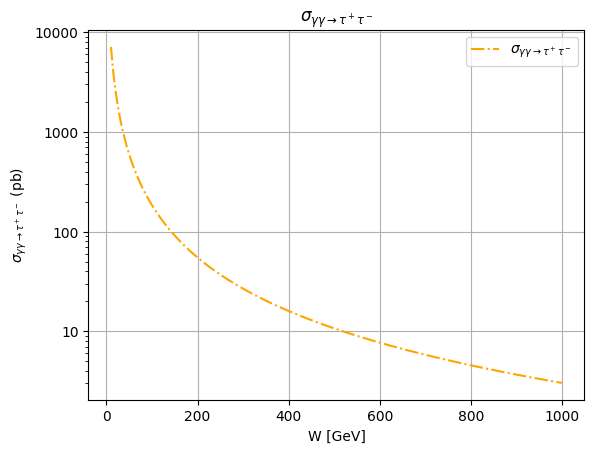

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Generate x values from 100 to 1000
wvalue = np.linspace(10, 1000, 300)



#=================================================================


def cs_version_3(wvalue):
    re = 2.8179403262e-15 * 137.0 / 128.0
    me = 0.510998950e-3
    mtau = 1.77686
    hbarc2 =  0.389
    alpha2 = (1.0/137.0)*(1.0/137.0)

    # Element-wise calculation of beta using np.where
    beta = np.sqrt(np.where(1.0 - 4.0 * mtau * mtau / wvalue**2.0 >= 0, 1.0 - 4.0 * mtau * mtau / wvalue**2.0, np.nan))

    # Element-wise calculation of cs using np.where
    cs = np.where(wvalue > mtau, (4.0 * np.pi * alpha2 * hbarc2 ) / wvalue**2.0 * (beta) * \
             ( (3.0 - (beta**4.0))/(2.0 * beta) * np.log((1.0+beta)/(1.0-beta)) - 2.0 + beta**2.0), 0.) * 1e9

    return cs

#=================================================================

# Calculate y values using all three functions
y_version_3 = cs_version_3(wvalue)


# Create a figure and axes
fig, ax = plt.subplots()


# Plot the data with different colors
ax.plot(wvalue, y_version_3, label='$\sigma_{\gamma \gamma \\to  \\tau^+\\tau^-}$', linestyle='dashdot', color='orange')

# Set y-axis scale to logarithmic
ax.set_yscale("log")

# Customize the plot
ax.set_xlabel('W [GeV]')
ax.set_ylabel('$\sigma_{\gamma \gamma \\to \\tau^+\\tau^-}$ (pb)')
ax.set_title('$\sigma_{\gamma \gamma \\to  \\tau^+\\tau^-}$')
ax.legend()

# Set y-axis ticks in the form of 0.1, 0.2, etc.
ax.yaxis.set_major_formatter(ScalarFormatter())


plt.grid(True)


# Save the plot as a PDF file
plt.savefig('cross_section_tautau_plot.pdf')   
plt.savefig('cross_section_tautau_plot.jpg')

# Show the plot
plt.show()

